# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import pandas as pd
import numpy as np

pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', 
                   fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv('data/Employee.csv')
employee.head(10)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [3]:
employee.columns

Index(['Name', 'Department', 'Education', 'Gender', 'Title', 'Years',
       'Salary'],
      dtype='object')

#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [4]:
# Method 1
# your answer here
employee[['Department','Salary']].groupby('Department').mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [5]:
# Method 2
# your answer here
employee.pivot_table(index=['Department'], values=['Salary'])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [6]:
# your answer here
employee.pivot_table(columns=['Department','Title'], values=['Salary'], aggfunc='mean')

        Department  Title    
Salary  HR          VP           70.0
                    analyst      32.5
        IT          VP           70.0
                    analyst      32.5
                    associate    60.0
        Sales       associate    55.0
dtype: float64

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [7]:
# your answer here
employee.pivot_table(columns=['Title', 'Years'], values=['Salary'])

        Title      Years
Salary  VP         8        70
        analyst    1        35
                   2        30
                   4        35
        associate  2        55
                   3        55
                   7        60
dtype: int64

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [8]:
# your answer here
#'Title' 'Salary' 'Department'

employee.pivot_table(values=['Salary'], index=['Department','Title'], aggfunc=[np.mean,'count'])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [9]:
# your answer here

employee.pivot_table(columns=['Department','Title'], values=['Salary'], aggfunc=['median','min', 'max', 'std'])

median  min  max       std
       Department Title                                
Salary HR         VP           70.0   70   70       NaN
                  analyst      32.5   30   35  3.535534
       IT         VP           70.0   70   70       NaN
                  analyst      32.5   30   35  3.535534
                  associate    60.0   60   60       NaN
       Sales      associate    55.0   55   55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
# your answer here
employee_new = employee.pivot_table(columns=['Department','Title'], values=['Salary'], aggfunc=['median','min', 'max', 'std'])
employee_new = employee_new.fillna(0)
employee_new

median  min  max       std
       Department Title                                
Salary HR         VP           70.0   70   70  0.000000
                  analyst      32.5   30   35  3.535534
       IT         VP           70.0   70   70  0.000000
                  analyst      32.5   30   35  3.535534
                  associate    60.0   60   60  0.000000
       Sales      associate    55.0   55   55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [11]:
# your answer here
employee.pivot_table(values=['Salary'], columns=['Department'], aggfunc=['count']) # ---> number of employees in each department

count         
Department    HR IT Sales
Salary         3  4     2

#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [12]:
# your answer here
employee.pivot_table(columns=['Department', 'Title', 'Years'], values=['Salary'], aggfunc='mean')

        Department  Title      Years
Salary  HR          VP         8        70
                    analyst    2        30
                               4        35
        IT          VP         8        70
                    analyst    1        35
                               2        30
                    associate  7        60
        Sales       associate  2        55
                               3        55
dtype: int64

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [13]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [14]:
# your answer here
fitbit = pd.read_csv('data/Fitbit.csv')

#### Explore your dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [15]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [16]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [17]:
# your answer here

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [18]:
# your answer here
fitbit[['Minutes Very Active', 'Steps']].corr()  # there is a moderate correlation

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [19]:
# your answer here
import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [20]:
# your answer here
fitbit[['Minutes Sedentary', 'Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

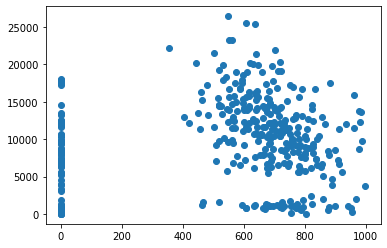

In [21]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [22]:
# your answer here
fitbit[['MinutesOfSleep', 'Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

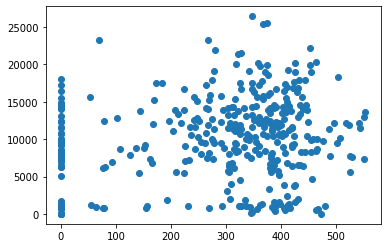

In [23]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [24]:
# your answer here
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


In [25]:
cor_fit = cor_fit.corr()

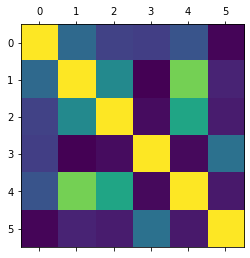

In [26]:
import matplotlib.pyplot as plt

plt.matshow(cor_fit.corr())
plt.show()

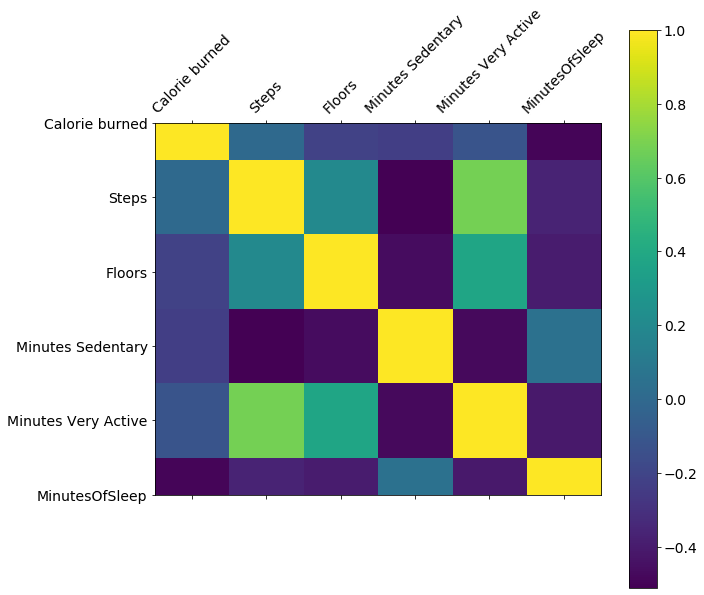

In [27]:
f = plt.figure(figsize=(10, 10))
plt.matshow(cor_fit.corr(), fignum=f.number)
plt.xticks(range(cor_fit.shape[1]), cor_fit.columns, fontsize=14, rotation=45)
plt.yticks(range(cor_fit.shape[1]), cor_fit.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [28]:
# your answer here
cor_fit.sort_values(by=['Steps'], ascending=True)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [31]:
# your answer here

time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades.head(5)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


In [33]:
time_grades.shape

(15, 3)

#### Show visually the frequency distribution of the time_grades dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206A0F62AC8>,
      dtype=object)

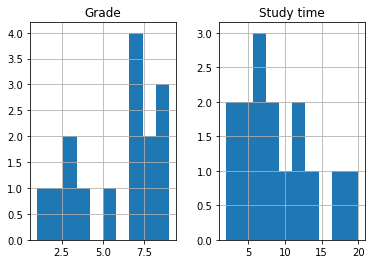

In [32]:
# your answer here
time_grades.hist()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [34]:
# your answer here
time_grades.columns

Index(['Name', 'Study time', 'Grade'], dtype='object')

In [35]:
time_grades[['Study time', 'Grade']].corr()

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

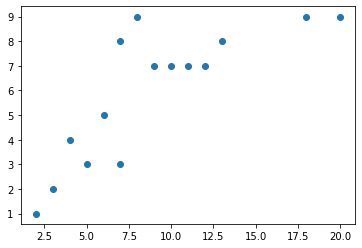

In [38]:
# your answer here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 